<a href="https://colab.research.google.com/github/JVictorBA/MVP2/blob/main/MVP%20-%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MVP 2 - Deep Learning

##Aluno: João Victor Barbosa de Araujo

##Matrícula: 4052023000334

Nesse trabalho de Deep Learning, irei ultlizar o data set "Ship datasets" extraido da plataforma Kaggle disponibilizado em "https://www.kaggle.com/datasets/arpitjain007/game-of-deep-learning-ship-datasets" onde iremos ensinar a maquina a destinguir os tipos de Navios entre:

- Cargo
- Military
- Carrier
- Cruise
- Tankers

##1) Importando Bibliotecas





In [2]:
pip install gdown

In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import gdown
import zipfile
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import requests
%matplotlib inline

##2) Importando Dataset

Agora vamos fazer o import dos arquivos que estão guardados no Google Drive em arquivos zip.

In [6]:
# Carregando o dataset
file_id = "1TQhPb4mkdnqxXYfbN_N89XmsryG6WuIT"
url = f"https://drive.google.com/uc?id={file_id}"

# https://drive.google.com/file/d/1TQhPb4mkdnqxXYfbN_N89XmsryG6WuIT/view?usp=drive_link

folder_path = "./train"  # Especifique a pasta onde baixará o arquivo
os.makedirs(folder_path, exist_ok=True)  # Cria a pasta de destino se necessário

output_dt = "train/train.csv"  # Especifique o nome do arquivo e a extensão do mesmo
gdown.download(url, output_dt)

Downloading...
From: https://drive.google.com/uc?id=1TQhPb4mkdnqxXYfbN_N89XmsryG6WuIT
To: /content/train/train.csv
100%|██████████| 87.3k/87.3k [00:00<00:00, 24.4MB/s]


'train/train.csv'

Depois de carregar o dataset, vamos definir um Path para o arquivo. Vamos repetir isso para o arquivo treino.

In [7]:
train_labels = pd.read_csv(output_dt)

train_labels['category'] = train_labels['category'] - 1
train_labels.head()

,image,category
0,2823080.jpg,0
1,2870024.jpg,0
2,2662125.jpg,1
3,2900420.jpg,2
4,2804883.jpg,1


In [8]:
# Carregando o dataset de imagens
image_id = "1ugRHnuPsrwCnb9eWRO15z0hZxQxaGSBQ"
url = f"https://drive.google.com/uc?id={image_id}"

# https://drive.google.com/file/d/1ugRHnuPsrwCnb9eWRO15z0hZxQxaGSBQ/view?usp=drive_link

folder_path = "./train"
os.makedirs(folder_path, exist_ok=True)

output_train = "train/train.zip"
gdown.download(url, output_train)

Downloading...
From: https://drive.google.com/uc?id=1ugRHnuPsrwCnb9eWRO15z0hZxQxaGSBQ
To: /content/train/train.zip
100%|██████████| 84.5M/84.5M [00:01<00:00, 60.0MB/s]


'train/train.zip'

In [44]:
destination = 'dt/dataset/train/'  # Definindo um Path onde se encontra o arquivo 'valid.zip'

os.makedirs(destination, exist_ok=True)

with zipfile.ZipFile(output_train, 'r') as zip_ref:
    zip_ref.extractall(destination)

In [45]:
X = []
y = []
path = "dt/dataset/train/"
img_shape = 128
for i in train_labels.iterrows() :
    img_path = os.path.join(path, i[1]['image'])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_shape,img_shape), interpolation='lanczos')
    img = tf.keras.preprocessing.image.img_to_array(img)
    X.append(img)
    y.append(float(i[1]['category']))
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape

((6252, 128, 128, 3), (6252,))

In [20]:
X = X / 255.0

##3) Visualizando imagens de amostra do conjunto de dados

Para comprovar que deu certo o import do dataset, vamos plotar uma imagem do dataset como exemplo.

Text(0.5, 1.0, '4.0')

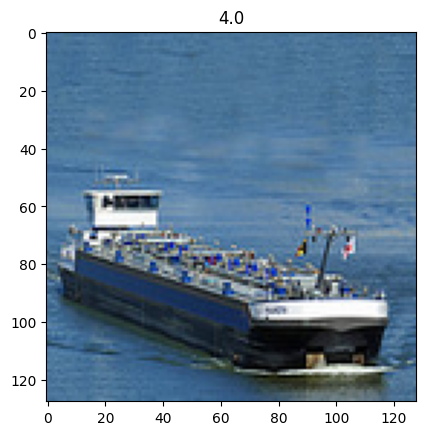

In [23]:
plt.imshow(X[1000])
plt.title(y[1000])

##4) Criando um modelo de Deep Learning usando Keras

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((img_shape,img_shape,3)),
    tf.keras.applications.MobileNet(include_top=False, weights='imagenet'),
    tf.keras.layers.Conv2D(3, 3, padding='same', activation='sigmoid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 3)           27651     
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 5)                 245       
                                                                 
Total params: 3,256,760
Trainable params: 3,234,872
Non-trainable params: 21,888
_________________________________________________________________


##5) Treinando o Modelo

In [38]:
model.fit(X, y, epochs=25, batch_size=128, validation_split=0.25, shuffle=True)


Epoch 1/25
37/37 [==============================] - 392s 11s/step - loss: 0.3658 - accuracy: 0.9753 - val_loss: 0.6712 - val_accuracy: 0.7895
Epoch 2/25
37/37 [==============================] - 392s 11s/step - loss: 0.2819 - accuracy: 0.9887 - val_loss: 0.5321 - val_accuracy: 0.8484
Epoch 3/25
37/37 [==============================] - 408s 11s/step - loss: 0.2242 - accuracy: 0.9955 - val_loss: 0.4742 - val_accuracy: 0.8708
Epoch 4/25
37/37 [==============================] - 386s 10s/step - loss: 0.1824 - accuracy: 0.9983 - val_loss: 0.4466 - val_accuracy: 0.8740
Epoch 5/25
37/37 [==============================] - 435s 12s/step - loss: 0.1519 - accuracy: 0.9996 - val_loss: 0.4233 - val_accuracy: 0.8829
Epoch 6/25
37/37 [==============================] - 412s 11s/step - loss: 0.1299 - accuracy: 0.9998 - val_loss: 0.4018 - val_accuracy: 0.8874
Epoch 7/25
37/37 [==============================] - 387s 10s/step - loss: 0.1135 - accuracy: 1.0000 - val_loss: 0.3841 - val_accuracy: 0.8906
Epoch 

In [39]:
model.evaluate(X,y)

196/196 [==============================] - 80s 405ms/step - loss: 0.1053 - accuracy: 0.9757


[0.10526427626609802, 0.9756878018379211]

##6) Definindo rótulos para a previsão


In [40]:
labels_inv = {'Cargo': 0,
              'Military': 1,
              'Carrier': 2,
              'Cruise': 3,
              'Tankers': 4}
labels = {v:k for k,v in labels_inv.items()}
labels

{0: 'Cargo', 1: 'Military', 2: 'Carrier', 3: 'Cruise', 4: 'Tankers'}

##7) Função Auxiliar para Previsão

In [41]:
def predict(path) :
    img = tf.keras.preprocessing.image.load_img(path, target_size=(img_shape,img_shape), interpolation='lanczos')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    pred = model.predict(np.array([img]))
    plt.imshow(img)
    pred_label = np.argsort(pred)
    for i in pred_label[0][-1:-3:-1] :
        print(f"{labels[i]} Ship : {pred[0][i]*100:0.2f} %")

##8) Testando o modelo em vários dados obtidos da Internet

Apartir de agora, vamos utilizar imagens novas e aleatórias da internet para saber se o Modelo está devidamente treinado a identificar cada tipo de navio.


In [46]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg/1200px-MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg

--2023-07-23 20:54:23--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg/1200px-MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221071 (216K) [image/jpeg]
Saving to: ‘1200px-MAERSK_MC_KINNEY_MÖLLER_&_MARSEILLE_MAERSK_(48694054418).jpg.1’

1200px-MAERSK_MC_KI 100%[===================>] 215.89K  --.-KB/s    in 0.01s   

2023-07-23 20:54:24 (14.5 MB/s) - ‘1200px-MAERSK_MC_KINNEY_MÖLLER_&_MARSEILLE_MAERSK_(48694054418).jpg.1’ saved [221071/221071]



1/1 [==============================] - 0s 44ms/step
Cargo Ship : 45.46 %
Military Ship : 34.44 %


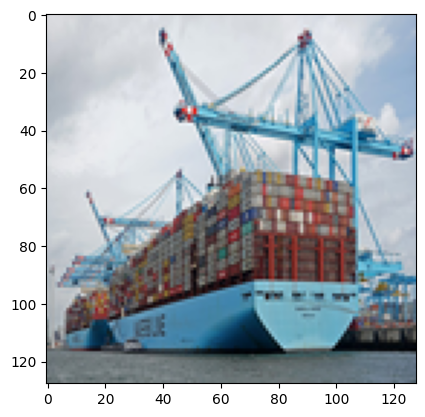

In [47]:
predict("./1200px-MAERSK_MC_KINNEY_MÖLLER_&_MARSEILLE_MAERSK_(48694054418).jpg") # Cargo Ship Example from Internet

In [48]:
!wget https://media.architecturaldigest.com/photos/593829315838160353567328/master/pass/mscworldclass.jpg

--2023-07-23 20:54:48--  https://media.architecturaldigest.com/photos/593829315838160353567328/master/pass/mscworldclass.jpg
Resolving media.architecturaldigest.com (media.architecturaldigest.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.architecturaldigest.com (media.architecturaldigest.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193144 (189K) [image/jpeg]
Saving to: ‘mscworldclass.jpg.1’

mscworldclass.jpg.1 100%[===================>] 188.62K  --.-KB/s    in 0.01s   

2023-07-23 20:54:48 (12.6 MB/s) - ‘mscworldclass.jpg.1’ saved [193144/193144]



1/1 [==============================] - 0s 44ms/step
Cargo Ship : 47.47 %
Military Ship : 31.38 %


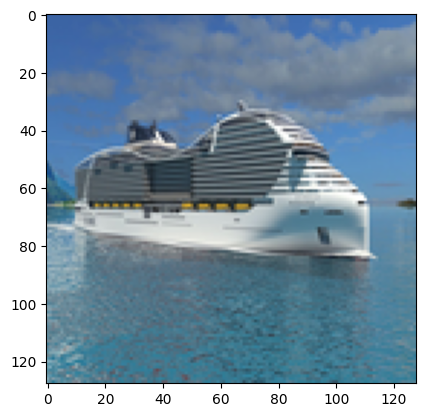

In [49]:
predict("./mscworldclass.jpg") # Cruise Ship Example from Internet

In [50]:
!wget https://images.livemint.com/img/2020/07/06/600x338/USaircraftcarriers-k59B--621x414@LiveMint_1594024838759.jpg

--2023-07-23 20:54:55--  https://images.livemint.com/img/2020/07/06/600x338/USaircraftcarriers-k59B--621x414@LiveMint_1594024838759.jpg
Resolving images.livemint.com (images.livemint.com)... 23.43.30.51, 2a02:26f0:fe00:2ba::1833, 2a02:26f0:fe00:2b7::1833
Connecting to images.livemint.com (images.livemint.com)|23.43.30.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28408 (28K) [image/jpeg]
Saving to: ‘USaircraftcarriers-k59B--621x414@LiveMint_1594024838759.jpg’

USaircraftcarriers- 100%[===================>]  27.74K  --.-KB/s    in 0.04s   

2023-07-23 20:54:56 (617 KB/s) - ‘USaircraftcarriers-k59B--621x414@LiveMint_1594024838759.jpg’ saved [28408/28408]



1/1 [==============================] - 0s 39ms/step
Cargo Ship : 43.03 %
Military Ship : 36.01 %


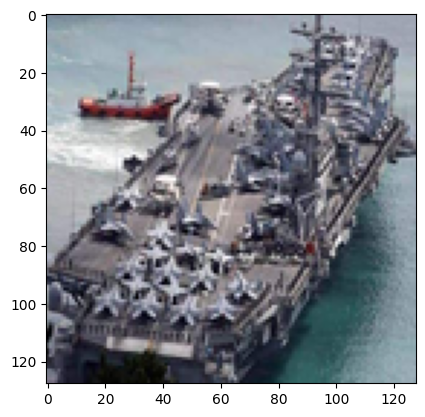

In [51]:
predict("./USaircraftcarriers-k59B--621x414@LiveMint_1594024838759.jpg") # Military Ship Example from Internet

In [52]:
!wget https://www.dnv.com/Images/KP_Tan_269_Tanker_vessel_tcm71-192023.jpg

--2023-07-23 20:55:26--  https://www.dnv.com/Images/KP_Tan_269_Tanker_vessel_tcm71-192023.jpg
Resolving www.dnv.com (www.dnv.com)... 193.161.97.170
Connecting to www.dnv.com (www.dnv.com)|193.161.97.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256495 (250K) [image/jpeg]
Saving to: ‘KP_Tan_269_Tanker_vessel_tcm71-192023.jpg.1’

KP_Tan_269_Tanker_v 100%[===================>] 250.48K  1.19MB/s    in 0.2s    

2023-07-23 20:55:27 (1.19 MB/s) - ‘KP_Tan_269_Tanker_vessel_tcm71-192023.jpg.1’ saved [256495/256495]



1/1 [==============================] - 0s 38ms/step
Cargo Ship : 44.93 %
Military Ship : 34.62 %


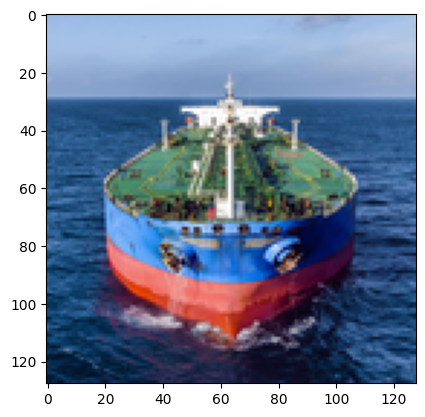

In [53]:
predict("./KP_Tan_269_Tanker_vessel_tcm71-192023.jpg") # Tanker Ship Example from Internet

In [54]:
!wget https://images02.military.com/sites/default/files/2020-02/uss-independence-eastern-pacific-1800.jpg

--2023-07-23 20:55:37--  https://images02.military.com/sites/default/files/2020-02/uss-independence-eastern-pacific-1800.jpg
Resolving images02.military.com (images02.military.com)... 18.244.114.40, 18.244.114.94, 18.244.114.51, ...
Connecting to images02.military.com (images02.military.com)|18.244.114.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188749 (184K) [image/jpeg]
Saving to: ‘uss-independence-eastern-pacific-1800.jpg’

uss-independence-ea 100%[===================>] 184.33K   476KB/s    in 0.4s    

2023-07-23 20:55:37 (476 KB/s) - ‘uss-independence-eastern-pacific-1800.jpg’ saved [188749/188749]



1/1 [==============================] - 0s 39ms/step
Cargo Ship : 46.27 %
Military Ship : 32.58 %


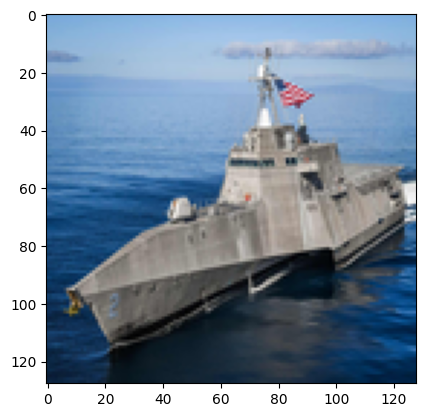

In [55]:
predict("./uss-independence-eastern-pacific-1800.jpg")

In [56]:
!wget https://cdn.britannica.com/34/94834-050-16DB7EEB/USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg

--2023-07-23 20:55:44--  https://cdn.britannica.com/34/94834-050-16DB7EEB/USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 108.156.60.126, 108.156.60.24, 108.156.60.26, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|108.156.60.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263703 (258K) [image/jpeg]
Saving to: ‘USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg’

USS-Carl-Vinson-air 100%[===================>] 257.52K   949KB/s    in 0.3s    

2023-07-23 20:55:45 (949 KB/s) - ‘USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg’ saved [263703/263703]



1/1 [==============================] - 0s 38ms/step
Cargo Ship : 45.26 %
Military Ship : 33.24 %


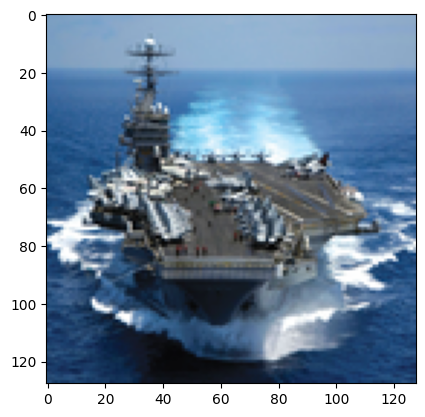

In [57]:
predict("./USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg")

In [58]:
!wget https://chantiers-atlantique.com/wp-content/uploads/2021/05/Page-Activite%CC%81s-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg

--2023-07-23 20:55:51--  https://chantiers-atlantique.com/wp-content/uploads/2021/05/Page-Activite%CC%81s-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg
Resolving chantiers-atlantique.com (chantiers-atlantique.com)... 217.147.196.220
Connecting to chantiers-atlantique.com (chantiers-atlantique.com)|217.147.196.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276929 (270K) [image/jpeg]
Saving to: ‘Page-Activités-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg’

Page-Activite%cc%81 100%[===================>] 270.44K  --.-KB/s    in 0.04s   

2023-07-23 20:55:51 (7.21 MB/s) - ‘Page-Activités-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg’ saved [276929/276929]



1/1 [==============================] - 0s 38ms/step
Cargo Ship : 46.39 %
Military Ship : 33.63 %


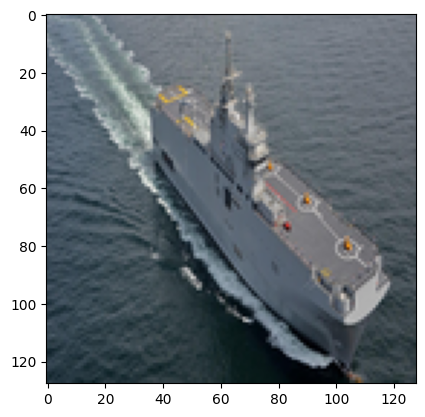

In [59]:
predict("./Page-Activités-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg")

In [60]:
!wget https://img.theweek.in/content/dam/week/news/india/images/2020/2/19/kavaratti-grse.jpg

--2023-07-23 20:55:58--  https://img.theweek.in/content/dam/week/news/india/images/2020/2/19/kavaratti-grse.jpg
Resolving img.theweek.in (img.theweek.in)... 72.246.144.92, 2a02:26f0:fe00:3bd::4a9, 2a02:26f0:fe00:3a9::4a9
Connecting to img.theweek.in (img.theweek.in)|72.246.144.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51690 (50K) [image/jpeg]
Saving to: ‘kavaratti-grse.jpg’

kavaratti-grse.jpg  100%[===================>]  50.48K  --.-KB/s    in 0.1s    

2023-07-23 20:55:59 (432 KB/s) - ‘kavaratti-grse.jpg’ saved [51690/51690]



1/1 [==============================] - 0s 37ms/step
Cargo Ship : 48.27 %
Military Ship : 31.60 %


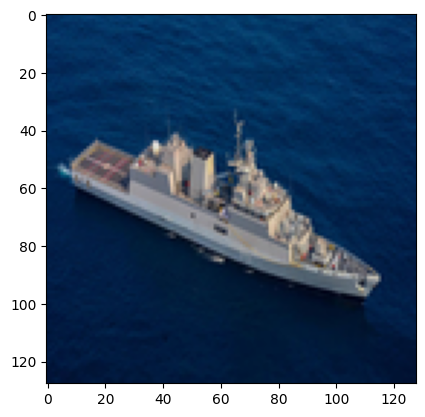

In [61]:
predict("./kavaratti-grse.jpg")

In [62]:
!wget https://upload.wikimedia.org/wikipedia/commons/7/75/INS_Mumbai_%28D62%29_underway.jpg

--2023-07-23 20:56:05--  https://upload.wikimedia.org/wikipedia/commons/7/75/INS_Mumbai_%28D62%29_underway.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386169 (377K) [image/jpeg]
Saving to: ‘INS_Mumbai_(D62)_underway.jpg’

INS_Mumbai_(D62)_un 100%[===================>] 377.12K  --.-KB/s    in 0.1s    

2023-07-23 20:56:05 (2.66 MB/s) - ‘INS_Mumbai_(D62)_underway.jpg’ saved [386169/386169]



1/1 [==============================] - 0s 37ms/step
Cargo Ship : 44.97 %
Military Ship : 33.14 %


Exception ignored in: <function _xla_gc_callback at 0x7ed5ef0c7a30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


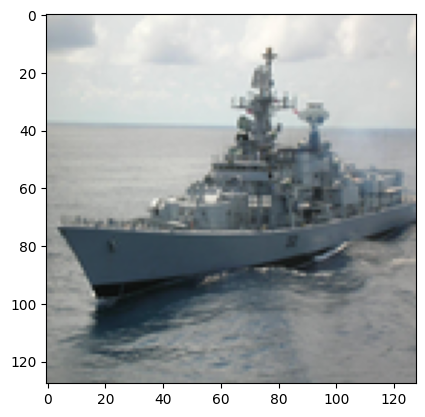

In [63]:
predict("./INS_Mumbai_(D62)_underway.jpg")

In [66]:
!wget https://www.theenterpriseworld.com/wp-content/uploads/2021/03/suez-canal-ship-stuck.jpg

--2023-07-23 20:57:01--  https://www.theenterpriseworld.com/wp-content/uploads/2021/03/suez-canal-ship-stuck.jpg
Resolving www.theenterpriseworld.com (www.theenterpriseworld.com)... 154.41.249.93, 2a02:4780:22:f679:bba6:bc8f:8811:f5db
Connecting to www.theenterpriseworld.com (www.theenterpriseworld.com)|154.41.249.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52394 (51K) [image/jpeg]
Saving to: ‘suez-canal-ship-stuck.jpg’

suez-canal-ship-stu 100%[===================>]  51.17K  --.-KB/s    in 0.01s   

2023-07-23 20:57:01 (4.45 MB/s) - ‘suez-canal-ship-stuck.jpg’ saved [52394/52394]



1/1 [==============================] - 0s 64ms/step
Cargo Ship : 47.07 %
Military Ship : 32.48 %


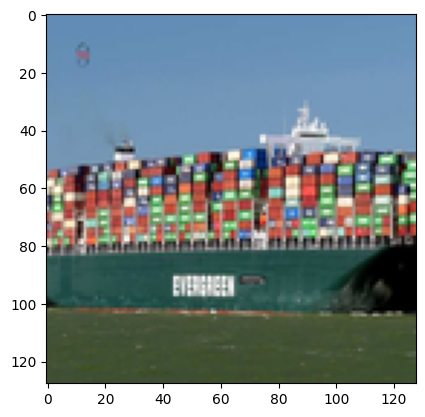

In [67]:
predict("./suez-canal-ship-stuck.jpg")

##9) Conclusão

In [81]:
# Rótulos corretos para as imagens
rotulos_corretos = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

# Previsões do modelo
previsoes_modelo = [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]

# Calculando a acurácia
acuracia = sum(1 for p, r in zip(previsoes_modelo, rotulos_corretos) if p == r) / len(rotulos_corretos)

# Exibindo a acurácia
print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 50.00%


Obtemos o resultado de 50% de acuracio depois que treinamos o modelo acima.